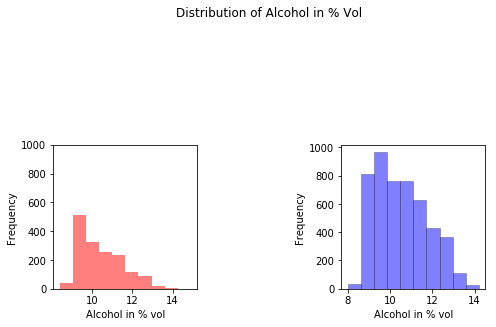

In [12]:
#LOADING THE DATA

import pandas as pd
import matplotlib.pyplot as plt

white = pd.read_csv('winequality-white.csv', sep=';')
red = pd.read_csv('winequality-red.csv', sep=';')

white.index += 1
red.index += 1


#print (white)
#print (red)

#pd.isnull(red)
#red.describe()
#red.sample(10)




#VISUALIZING THE DATA

fig, ax = plt.subplots(1,2)

ax[0].hist(red.alcohol, 10, facecolor = 'red', alpha = 0.5 , label = 'Red Wine')
ax[1].hist(white.alcohol, 10, facecolor = 'blue', ec='black' , lw = 0.5, alpha = 0.5, label = 'White Wine')

fig.subplots_adjust(left=0, right=1, bottom=0, top =0.5, hspace=0.05, wspace=1)

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel('Alcohol in % vol')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Alcohol in % vol')
ax[1].set_ylabel('Frequency')

fig.suptitle ('Distribution of Alcohol in % Vol')

plt.show()





In [13]:

import numpy as np

print (np.histogram (red.alcohol, bins= [7,8,9,10,11,12,13,14,15]))

print (np.histogram (white.alcohol, bins = [7,8,9,10,11,12,13,14,15]))



(array([  0,   7, 673, 452, 305, 133,  21,   8]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


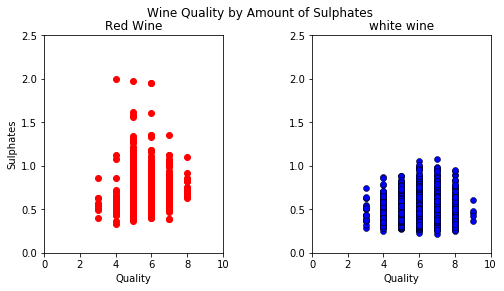

In [14]:


fig, ax = plt.subplots(1,2, figsize = (8,4))

ax[0].scatter(red['quality'], red['sulphates'], color = 'red')

ax[1].scatter(white['quality'], white['sulphates'], color='blue', edgecolors= 'black', lw=0.5)

ax[0].set_title('Red Wine')
ax[1].set_title('white wine')

ax[0].set_xlabel('Quality')
ax[1].set_xlabel('Quality')
ax[0].set_ylabel('Sulphates')
ax[0].set_ylabel('Sulphates')

ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0, 2.5])
ax[1].set_ylim([0, 2.5])

fig.subplots_adjust(wspace = 0.5)
fig.suptitle('Wine Quality by Amount of Sulphates')

plt.show()






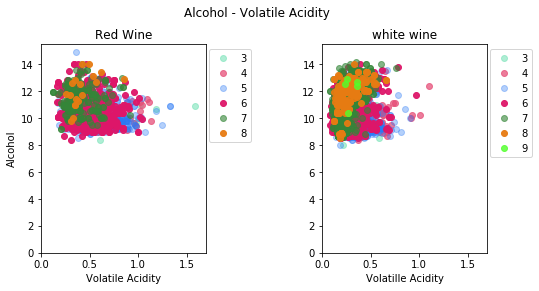

In [15]:
np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

fig, ax = plt.subplots (1,2, figsize = (8,4))

redcolors = np.random.rand (6,4,)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range (len(redcolors)):
    redy = red ['alcohol'][red.quality == redlabels[i]]
    
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    
    ax[0].scatter (redx, redy, c = redcolors[i])
    
for i in range (len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    
    whitex = white ['volatile acidity'][white.quality == whitelabels[i]]
    
    ax[1].scatter(whitex,whitey, c = whitecolors[i])
    
    
    
    
ax[0].set_title('Red Wine')
ax[1].set_title('white wine')

ax[0].set_xlabel('Volatile Acidity')
ax[1].set_xlabel('Volatille Acidity')
ax[0].set_ylabel('Alcohol')
ax[0].set_ylabel('Alcohol')

ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([0, 15.5])
ax[1].set_ylim([0, 15.5])
    
ax[1].legend (whitelabels, loc = 'best', bbox_to_anchor = (1.3,1))


ax[0].legend (redlabels, loc = 'best', bbox_to_anchor = (1.3,1))

fig.subplots_adjust (top=0.85, wspace=0.7)
fig.suptitle('Alcohol - Volatile Acidity')

plt.show()
    



In [16]:
white.describe()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [17]:
#PREPROCESS THE DATA

#ADD A TYPE TO RED AND WHITE
red['type'] = 1

white['type'] = 0

#APPEND WHITE TO RED

wines = red.append(white, ignore_index = True)

#print(red)


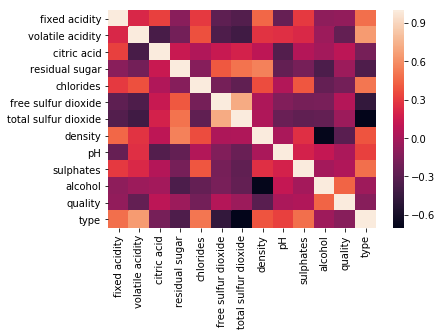

In [18]:
#CORRELATION MATRIX

import seaborn as sns

corr = wines.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

plt.show()

In [19]:

#TRAIN AND TEST DATA

from sklearn.model_selection import train_test_split

x= wines.iloc[:,0:11]

y= np.ravel(wines.type)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 42)

#STANDARDIZE THE DATA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_test = scaler.transform(x_test)




In [21]:
#USING KERAS

import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

#initialize the constructor

model = Sequential()


#Add an input layer
model.add(Dense(12, activation= 'relu', input_shape = (11, )))

#Add one hidden layer
model.add(Dense(8, activation = 'relu'))

#Add an output layer

model.add(Dense (1, activation = 'sigmoid'))




In [22]:
model.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 11),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_10',
    'trainable': True,
    'units': 12,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 

In [23]:
model.get_weights()

[array([[-0.33164757, -0.11040947,  0.46338302,  0.00463384,  0.10520852,
         -0.32250178, -0.22539482,  0.35540187, -0.06707999, -0.33548415,
          0.2510987 , -0.28335804],
        [-0.33938235,  0.11116338, -0.07770544, -0.16566372, -0.36063275,
         -0.02959758, -0.1950728 , -0.1828917 , -0.34028116, -0.26264536,
          0.4050247 , -0.3928973 ],
        [ 0.31560457, -0.07685801,  0.02521569,  0.39168477,  0.39475274,
         -0.11899838,  0.29205495,  0.47402918, -0.05970737,  0.10494757,
         -0.1936433 , -0.44088387],
        [-0.23918417,  0.18788403,  0.37751222,  0.07361275, -0.47282144,
          0.1917848 ,  0.08085304, -0.13159278, -0.49465904, -0.23473689,
         -0.15912971, -0.05265826],
        [ 0.4459064 ,  0.4648012 , -0.5064903 ,  0.33527446, -0.3550207 ,
          0.05756366, -0.13063419, -0.1259436 , -0.06854236, -0.46423692,
          0.34196538,  0.07955503],
        [ 0.40645957, -0.24604693,  0.39636612, -0.34503847,  0.23201281,
      

In [24]:
#COMPILE AND FIT

model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.2516 - acc: 0.9177
Epoch 2/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.1701 - acc: 0.9442
Epoch 3/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.1395 - acc: 0.9499
Epoch 4/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.1118 - acc: 0.9598
Epoch 5/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0953 - acc: 0.9694
Epoch 6/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0871 - acc: 0.9708
Epoch 7/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0862 - acc: 0.9722
Epoch 8/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0782 - acc: 0.9729
Epoch 9/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0798 - acc: 0.9731
Epoch 10/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0752 - acc: 0.9752
Epoch 11/20
4352/4352 [======

In [25]:
#PREDICT VALUES



y_pred= model.predict(x_test)


In [26]:
y_pred[:5]

array([[3.0608790e-05],
       [1.0000000e+00],
       [2.8463060e-03],
       [5.3285770e-03],
       [2.5989747e-01]], dtype=float32)

In [27]:
y_test[:5]

array([0, 1, 0, 0, 0])

In [28]:
#EVALUATE MODELS

score = model.evaluate(x_test, y_test, verbose=1)
print(score)

2145/2145 [==============================] - 0s 49us/step
[0.7972509473327103, 0.9016317016317016]


In [40]:
#EVALUATE MODELS


from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

#CONFUSION MATRIX

#confusion_matrix(y_test,y_pred)

#precision 

#precision_score(y_test, y_pred)

#RECALL

#recall_score(y_test, y_pred)

#F1 SCORE

#f1_score(y_test, y_pred)

#COHEN'S KAPPA

#cohen_kappa_score(y_test, y_pred)







ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [42]:
#ISOLATE TARGET LABELS

y = wines.

#ISOLATE DATA
x = wines.drop('quality')

SyntaxError: invalid syntax (<ipython-input-42-688dc0adab00>, line 3)